In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas as pd
import numpy as np
import tensorflow as tf
import time
from tensorflow import keras
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import os
import glob
from tensorflow.keras.models import Sequential
from tensorflow.keras import layers
from tensorflow.keras.utils import to_categorical
from sklearn.model_selection import train_test_split
from keras.models import Model
# from keras.layers.normalization import BatchNormalization
from keras.layers import Conv2D
from keras.layers import MaxPooling2D
from keras.layers import Activation
from keras.layers import Dropout
from keras.layers import Lambda
from keras.layers import Dense
# from keras.optimizers import SGD
from keras.layers import Flatten
from keras.layers import Input
import tensorflow as tf
from sklearn import datasets
from sklearn.metrics import confusion_matrix
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn import preprocessing
from sklearn.decomposition import PCA

In [ ]:
def split_X_y(data):
  X = data.drop('H/A',axis = 1)
  X = X.drop('W/A',axis = 1)
  X = X.drop('W/H',axis = 1)
  X = X.drop('bmi',axis = 1)
  #X = X.drop('HAWH',axis = 1)
  y1 = data['W/A']
  y2 = data['H/A']
  y3 = data['W/H']
  y4 = data['bmi']
  #y5 = data['HAWH']
  y1 = y1.to_frame()  # convert y outputs from series to dataframe
  y2 = y2.to_frame()
  y3 = y3.to_frame()
  y4 = y4.to_frame()
  print(X.shape, 'X shape')
  print(y1.shape, 'y1 shape')
  print(y2.shape, 'y2 shape')
  print(y3.shape, 'y3 shape')
  print(y4.shape, 'y4 shape')
  #print(y5.shape, 'y5 shape')
  return X, y1, y2, y3, y4


In [ ]:
def norm(data):
  _data = pd.DataFrame(columns=data.columns)
  for c in data.columns:           #Normalization of Data
    min = data[c].min()
    max = data[c].max()
    _data[c] = (data[c] - min)/(max - min)
    # _data = data
  print(_data.head())
  return _data

In [ ]:
def get_accuracy(pred, y_test):
  a = np.argmax(pred, axis = 1)
  accuracy = []
  count = 0
  for i,c in enumerate(y_test):
    if c == a[i]:
      accuracy.append(1)
      count += 1
    else:
      accuracy.append(0)
  print('accuracy', count/len(accuracy))
  return count/len(accuracy)

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/IAKR7EDT/sampled_final_data_preprocessed.csv')

In [ ]:
df.shape
df

,Unnamed: 0,Source of drinking water,child's weight(in kgs)(one decimal),Caste,Mother's age at first birth,wealth index,v444a,hw1,body mass index,mother's height,...,state,index to birth history,Area,Religion,months of bf,bmi,H/A,W/A,W/H,mothers_bmi
0,4,Improved,50.0,OBC,20-29,Middle,-98.0,2.0,2111.0,1489.0,...,East_India,1.0,Urban,Muslim,<24,16.058375,1.2200,20.0,2.45,2.1
1,19,Improved,51.0,SC,30-39,Richest,-91.0,3.0,2160.0,1556.0,...,North_India,1.0,Urban,Hindu,<24,15.004899,1.2825,20.5,2.50,2.2
2,27,Improved,84.0,OBC,20-29,Richer,-125.0,8.0,1999.0,1552.0,...,Central_India,1.0,Rural,Hindu,<24,15.298289,1.6775,37.0,4.15,2.0
3,47,Improved,37.0,OBC,20-29,Richest,46.0,2.0,2584.0,1520.0,...,East_India,1.0,Rural,Hindu,<24,12.595144,1.1800,13.5,1.80,2.6
4,76,Improved,89.0,SC,20-29,Poorer,-236.0,10.0,1657.0,1444.0,...,East_India,1.0,Rural,Hindu,<24,18.059918,1.5800,39.5,4.40,1.7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
128,2268,Improved,112.0,ST,20-29,Poorer,-5.0,29.0,2570.0,1519.0,...,NorthEast_India,1.0,Urban,Others,>24,12.357884,2.2050,51.0,5.55,2.6
129,2276,Improved,96.0,OBC,<20,Poorest,89.0,26.0,2738.0,1539.0,...,Central_India,1.0,Rural,Hindu,<24,9.429505,2.3475,43.0,4.75,2.7
130,2283,Unimproved,33.0,OBC,20-29,Richer,-116.0,3.0,1912.0,1577.0,...,South_India,1.0,Rural,Hindu,<24,6.295595,1.6350,11.5,1.60,1.9
131,2285,Improved,61.0,SC,<20,Richer,-97.0,7.0,1998.0,1504.0,...,West_India,1.0,Urban,Hindu,<24,14.572071,1.4425,25.5,3.00,2.0


**Data Load and Preprocessing**

df = original dataframe

dfl = label encoded dataframe

dfd = dummies dataframe


In [ ]:
dfl = pd.DataFrame()

In [ ]:
label_encoder = preprocessing.LabelEncoder()
dfl = df.apply(label_encoder.fit_transform)
# dfl['state']= label_encoder.fit_transform(df['state'])
# dfl['area']= label_encoder.fit_transform(df['area'])
# dfl['religion']= label_encoder.fit_transform(df['religion'])
# dfl['caste']= label_encoder.fit_transform(df['caste'])
# dfl['father\'s education']= label_encoder.fit_transform(df['father\'s education'])
# dfl['father\'s occupation']= label_encoder.fit_transform(df['father\'s occupation'])
# dfl['mother\'s education']= label_encoder.fit_transform(df['mother\'s education'])
# dfl['mother\'s occupation']= label_encoder.fit_transform(df['mother\'s occupation'])
# dfl['exposure to mass media']= label_encoder.fit_transform(df['exposure to mass media'])
# dfl['Source of drinking water']= label_encoder.fit_transform(df['Source of drinking water'])
# dfl['Toilet Facility'] = label_encoder.fit_transform(df['Toilet Facility'])
# dfl['mother\'s age']= label_encoder.fit_transform(df['mother\'s age'])
# dfl['mother\'s bmi']= label_encoder.fit_transform(df['mother\'s bmi'])
# dfl['child\'s age']= label_encoder.fit_transform(df['child\'s age'])
# dfl['sex of child']= label_encoder.fit_transform(df['sex of child'])
# dfl['birth weight']= label_encoder.fit_transform(df['birth weight'])
# dfl['initiation of bf(early initiation)']= label_encoder.fit_transform(df['initiation of bf(early initiation)'])
# dfl['wealth index']= label_encoder.fit_transform(df['wealth index'])
# dfl['months of bf']= label_encoder.fit_transform(df['months of bf'])
# dfl['immunization']= label_encoder.fit_transform(df['immunization'])
# dfl['sex of household head']= label_encoder.fit_transform(df['sex of household head'])
# dfl['H/A'] = df['H/A']
# dfl['W/A'] = df['W/A']
# dfl['W/H'] = df['W/H']
# dfl['Bmi'] = df['Bmi']
# dfl['HAWH'] = df['HAWH']
# dfl['history of illness'] = df['history of illness']
# dfl['index to birth history'] = df['index to birth history']
# dfl['no of living children'] = df['no of living children']
# dfl['dietary score'] = df['dietary score']
# dfl['total family members'] = df['total family members']
# dfl['type of family'] = df['type of family']

In [ ]:
dfl.shape
dfl

,Unnamed: 0,Source of drinking water,child's weight(in kgs)(one decimal),Caste,Mother's age at first birth,wealth index,v444a,hw1,body mass index,mother's height,...,state,index to birth history,Area,Religion,months of bf,bmi,H/A,W/A,W/H,mothers_bmi
0,0,0,8,0,0,0,52,2,64,35,...,1,0,1,2,0,84,6,8,8,7
1,1,0,9,2,1,4,56,3,70,74,...,3,0,1,1,0,56,11,9,9,8
2,2,0,33,0,0,3,43,8,48,71,...,0,0,0,1,0,69,53,33,33,6
3,3,0,5,0,0,4,94,2,106,55,...,1,0,0,1,0,15,4,5,5,12
4,4,0,38,2,0,1,9,10,6,17,...,1,0,0,1,0,118,36,38,38,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
128,128,0,59,3,0,1,84,29,104,54,...,2,0,1,3,1,13,110,59,59,12
129,129,0,43,0,2,2,99,26,112,66,...,0,0,0,1,0,2,114,43,43,13
130,130,1,3,0,0,3,45,3,37,84,...,4,0,0,1,0,0,46,3,3,5
131,131,0,13,2,2,3,53,7,47,45,...,5,0,1,1,0,44,22,13,13,6


In [ ]:

print(df.isnull().sum())
print(df.shape)


Unnamed: 0                             0
Source of drinking water               0
child's weight(in kgs)(one decimal)    0
Caste                                  0
Mother's age at first birth            0
wealth index                           0
v444a                                  0
hw1                                    0
body mass index                        0
mother's height                        0
Toilet Facility                        0
v440                                   0
number of living children              0
sex of household head                  0
Mother's Occupation                    0
Father's Education                     0
Father's Occupation                    0
v441                                   0
hw9                                    0
sex of child                           0
child's height(in cms)(one decimal)    0
currently in union                     0
hw12                                   0
v442                                   0
immunization    

In [ ]:
dfd = pd.get_dummies(df)

In [ ]:
dfd

,Unnamed: 0,child's weight(in kgs)(one decimal),v444a,hw1,body mass index,mother's height,v440,number of living children,v441,hw9,...,state_West_India,Area_Rural,Area_Urban,Religion_Christian,Religion_Hindu,Religion_Muslim,Religion_Others,Religion_Sikh,months of bf_<24,months of bf_>24
0,4,50.0,-98.0,2.0,2111.0,1489.0,-248.0,2,9095.0,8811.0,...,False,False,True,False,False,True,False,False,True,False
1,19,51.0,-91.0,3.0,2160.0,1556.0,-136.0,1,9505.0,7977.0,...,False,False,True,False,True,False,False,False,True,False
2,27,84.0,-125.0,8.0,1999.0,1552.0,-143.0,2,9480.0,9886.0,...,False,True,False,False,True,False,False,False,True,False
3,47,37.0,46.0,2.0,2584.0,1520.0,-196.0,1,9285.0,7092.0,...,False,True,False,False,True,False,False,False,True,False
4,76,89.0,-236.0,10.0,1657.0,1444.0,-324.0,2,8821.0,9188.0,...,False,True,False,False,True,False,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
128,2268,112.0,-5.0,29.0,2570.0,1519.0,-198.0,3,9279.0,8762.0,...,False,False,True,False,False,False,True,False,False,True
129,2276,96.0,89.0,26.0,2738.0,1539.0,-164.0,3,9401.0,99998.0,...,False,True,False,False,True,False,False,False,True,False
130,2283,33.0,-116.0,3.0,1912.0,1577.0,-101.0,1,9633.0,99998.0,...,False,True,False,False,True,False,False,False,True,False
131,2285,61.0,-97.0,7.0,1998.0,1504.0,-223.0,1,9187.0,7576.0,...,True,False,True,False,True,False,False,False,True,False


In [ ]:
dfh = pd.DataFrame()

In [ ]:
label_encoder = preprocessing.LabelEncoder()
dfl = df.apply(label_encoder.fit_transform)
# dfl['state']= label_encoder.fit_transform(df['state'])
# dfl['area']= label_encoder.fit_transform(df['area'])
# dfl['religion']= label_encoder.fit_transform(df['religion'])
# dfl['caste']= label_encoder.fit_transform(df['caste'])
# dfl['father\'s education']= label_encoder.fit_transform(df['father\'s education'])
# dfl['father\'s occupation']= label_encoder.fit_transform(df['father\'s occupation'])
# dfl['mother\'s education']= label_encoder.fit_transform(df['mother\'s education'])
# dfl['mother\'s occupation']= label_encoder.fit_transform(df['mother\'s occupation'])
# dfl['exposure to mass media']= label_encoder.fit_transform(df['exposure to mass media'])
# dfl['Source of drinking water']= label_encoder.fit_transform(df['Source of drinking water'])
# dfl['Toilet Facility'] = label_encoder.fit_transform(df['Toilet Facility'])
# dfl['mother\'s age']= label_encoder.fit_transform(df['mother\'s age'])
# dfl['mother\'s bmi']= label_encoder.fit_transform(df['mother\'s bmi'])
# dfl['child\'s age']= label_encoder.fit_transform(df['child\'s age'])
# dfl['sex of child']= label_encoder.fit_transform(df['sex of child'])
# dfl['birth weight']= label_encoder.fit_transform(df['birth weight'])
# dfl['initiation of bf(early initiation)']= label_encoder.fit_transform(df['initiation of bf(early initiation)'])
# dfl['wealth index']= label_encoder.fit_transform(df['wealth index'])
# dfl['months of bf']= label_encoder.fit_transform(df['months of bf'])
# dfl['immunization']= label_encoder.fit_transform(df['immunization'])
# dfl['sex of household head']= label_encoder.fit_transform(df['sex of household head'])
# dfl['H/A'] = df['H/A']
# dfl['W/A'] = df['W/A']
# dfl['W/H'] = df['W/H']
# dfl['Bmi'] = df['Bmi']
# dfl['HAWH'] = df['HAWH']
# dfl['history of illness'] = df['history of illness']
# dfl['index to birth history'] = df['index to birth history']
# dfl['no of living children'] = df['no of living children']
# dfl['dietary score'] = df['dietary score']
# dfl['total family members'] = df['total family members']
# dfl['type of family'] = df['type of family']|

dfd

In [ ]:
dfd

,Unnamed: 0,child's weight(in kgs)(one decimal),v444a,hw1,body mass index,mother's height,v440,number of living children,v441,hw9,...,state_West_India,Area_Rural,Area_Urban,Religion_Christian,Religion_Hindu,Religion_Muslim,Religion_Others,Religion_Sikh,months of bf_<24,months of bf_>24
0,4,50.0,-98.0,2.0,2111.0,1489.0,-248.0,2,9095.0,8811.0,...,False,False,True,False,False,True,False,False,True,False
1,19,51.0,-91.0,3.0,2160.0,1556.0,-136.0,1,9505.0,7977.0,...,False,False,True,False,True,False,False,False,True,False
2,27,84.0,-125.0,8.0,1999.0,1552.0,-143.0,2,9480.0,9886.0,...,False,True,False,False,True,False,False,False,True,False
3,47,37.0,46.0,2.0,2584.0,1520.0,-196.0,1,9285.0,7092.0,...,False,True,False,False,True,False,False,False,True,False
4,76,89.0,-236.0,10.0,1657.0,1444.0,-324.0,2,8821.0,9188.0,...,False,True,False,False,True,False,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
128,2268,112.0,-5.0,29.0,2570.0,1519.0,-198.0,3,9279.0,8762.0,...,False,False,True,False,False,False,True,False,False,True
129,2276,96.0,89.0,26.0,2738.0,1539.0,-164.0,3,9401.0,99998.0,...,False,True,False,False,True,False,False,False,True,False
130,2283,33.0,-116.0,3.0,1912.0,1577.0,-101.0,1,9633.0,99998.0,...,False,True,False,False,True,False,False,False,True,False
131,2285,61.0,-97.0,7.0,1998.0,1504.0,-223.0,1,9187.0,7576.0,...,True,False,True,False,True,False,False,False,True,False


dfh

In [ ]:
dfh = pd.DataFrame()

In [ ]:
df['Area']

0      Urban
1      Urban
2      Rural
3      Rural
4      Rural
       ...  
128    Urban
129    Rural
130    Rural
131    Urban
132    Rural
Name: Area, Length: 133, dtype: object

In [ ]:


dfh['Source of drinking water'] = df['Source of drinking water']
dfh['child\'s weight(in kgs)(one decimal)'] = df['child\'s weight(in kgs)(one decimal)']
dfh['Caste'] = df['Caste']
dfh['Mother\'s age at first birth'] = df['Mother\'s age at first birth']
dfh['wealth index'] = df['wealth index']
dfh['Weight/Height standard deviation'] = df['v444a']
dfh['age'] = df['hw1']
dfh['body mass index'] = df['body mass index']
dfh['mother\'s height'] = df['mother\'s height']
dfh['Toilet Facility'] = df['Toilet Facility']
dfh['Height/Age standard deviation'] = df['v440']
dfh['number of living children'] = df['number of living children']
dfh['sex of household head'] = df['sex of household head']
dfh['Mother\'s Occupation'] = df['Mother\'s Occupation']
dfh['Father\'s Education'] = df['Father\'s Education']
dfh['Father\'s Occupation'] = df['Father\'s Occupation']
dfh['Height/Age percent ref. median'] = df['v441']
dfh['Weight/Age percent of ref. median'] = df['hw9']
dfh['sex of child'] = df['sex of child']
dfh['child\'s height(in cms)(one decimal)'] = df['child\'s height(in cms)(one decimal)']
dfh['currently in union'] = df['currently in union']
dfh['Weight/Height percent of ref. median'] = df['hw12']
dfh['Weight/Height percent ref. median'] = df['v442']
dfh['immunization'] = df['immunization']
dfh['mother\'s weight'] = df['mother\'s weight']
dfh['state'] = df['state']
dfh['index to birth history'] = df['index to birth history']
dfh['Area'] = df['Area']
dfh['Religion'] = df['Religion']
dfh['months of bf'] = df['months of bf']
dfh['bmi'] = df['bmi']
dfh['H/A'] = df['H/A']
dfh['W/A'] = df['W/A']
dfh['W/H'] = df['W/H']
dfh['mothers_bmi'] = df['mothers_bmi']


print(dfh.head())


  Source of drinking water  child's weight(in kgs)(one decimal) Caste  \
0                 Improved                                 50.0   OBC   
1                 Improved                                 51.0    SC   
2                 Improved                                 84.0   OBC   
3                 Improved                                 37.0   OBC   
4                 Improved                                 89.0    SC   

  Mother's age at first birth wealth index  Weight/Height standard deviation  \
0                       20-29       Middle                             -98.0   
1                       30-39      Richest                             -91.0   
2                       20-29       Richer                            -125.0   
3                       20-29      Richest                              46.0   
4                       20-29       Poorer                            -236.0   

    age  body mass index  mother's height Toilet Facility  ...          state  \

In [ ]:
dfh.to_csv('sampled_final_data_preprocessed&labelled.csv')

In [ ]:
dfhd = pd.get_dummies(dfh)


**dfch**

In [ ]:
dfch = pd.DataFrame()

In [ ]:
dfch['source_of_drinking_water'] = df['Source of drinking water']
dfch['childs_weight_kg'] = df['child\'s weight(in kgs)(one decimal)']
dfch['caste'] = df['Caste']
dfch['mothers_age_at_first_birth'] = df['Mother\'s age at first birth']
dfch['wealth_index'] = df['wealth index']
dfch['age'] = df['hw1']
dfch['number_of_living_children'] = df['number of living children']
dfch['body_mass_index'] = df['body mass index']
dfch['toilet_facility'] = df['Toilet Facility']
dfch['mothers_occupation'] = df['Mother\'s Occupation']
dfch['fathers_education'] = df['Father\'s Education']
dfch['fathers_occupation'] = df['Father\'s Occupation']
dfch['sex_of_child'] = df['sex of child']
dfch['immunization'] = df['immunization']
dfch['state'] = df['state']
dfch['index_to_birth_history'] = df['index to birth history']
dfch['area'] = df['Area']
dfch['religion'] = df['Religion']
dfch['months_of_bf'] = df['months of bf']
dfch['bmi'] = df['bmi']
dfch['ha'] = df['H/A']
dfch['wa'] = df['W/A']
dfch['wh'] = df['W/H']
dfch['mothers_bmi'] = df['mothers_bmi']

In [ ]:
dfch.shape

(133, 24)

In [ ]:
dfch.to_csv('sampled_final_data_preprocessed&labelled_model_features.csv')

In [ ]:
dfchd = pd.get_dummies(dfch)

In [ ]:
dfchd

,childs_weight_kg,age,number_of_living_children,body_mass_index,index_to_birth_history,bmi,ha,wa,wh,mothers_bmi,...,state_West_India,area_Rural,area_Urban,religion_Christian,religion_Hindu,religion_Muslim,religion_Others,religion_Sikh,months_of_bf_<24,months_of_bf_>24
0,50.0,2.0,2,2111.0,1.0,16.058375,1.2200,20.0,2.45,2.1,...,False,False,True,False,False,True,False,False,True,False
1,51.0,3.0,1,2160.0,1.0,15.004899,1.2825,20.5,2.50,2.2,...,False,False,True,False,True,False,False,False,True,False
2,84.0,8.0,2,1999.0,1.0,15.298289,1.6775,37.0,4.15,2.0,...,False,True,False,False,True,False,False,False,True,False
3,37.0,2.0,1,2584.0,1.0,12.595144,1.1800,13.5,1.80,2.6,...,False,True,False,False,True,False,False,False,True,False
4,89.0,10.0,2,1657.0,1.0,18.059918,1.5800,39.5,4.40,1.7,...,False,True,False,False,True,False,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
128,112.0,29.0,3,2570.0,1.0,12.357884,2.2050,51.0,5.55,2.6,...,False,False,True,False,False,False,True,False,False,True
129,96.0,26.0,3,2738.0,1.0,9.429505,2.3475,43.0,4.75,2.7,...,False,True,False,False,True,False,False,False,True,False
130,33.0,3.0,1,1912.0,1.0,6.295595,1.6350,11.5,1.60,1.9,...,False,True,False,False,True,False,False,False,True,False
131,61.0,7.0,1,1998.0,1.0,14.572071,1.4425,25.5,3.00,2.0,...,True,False,True,False,True,False,False,False,True,False




```
Feature Engine
```



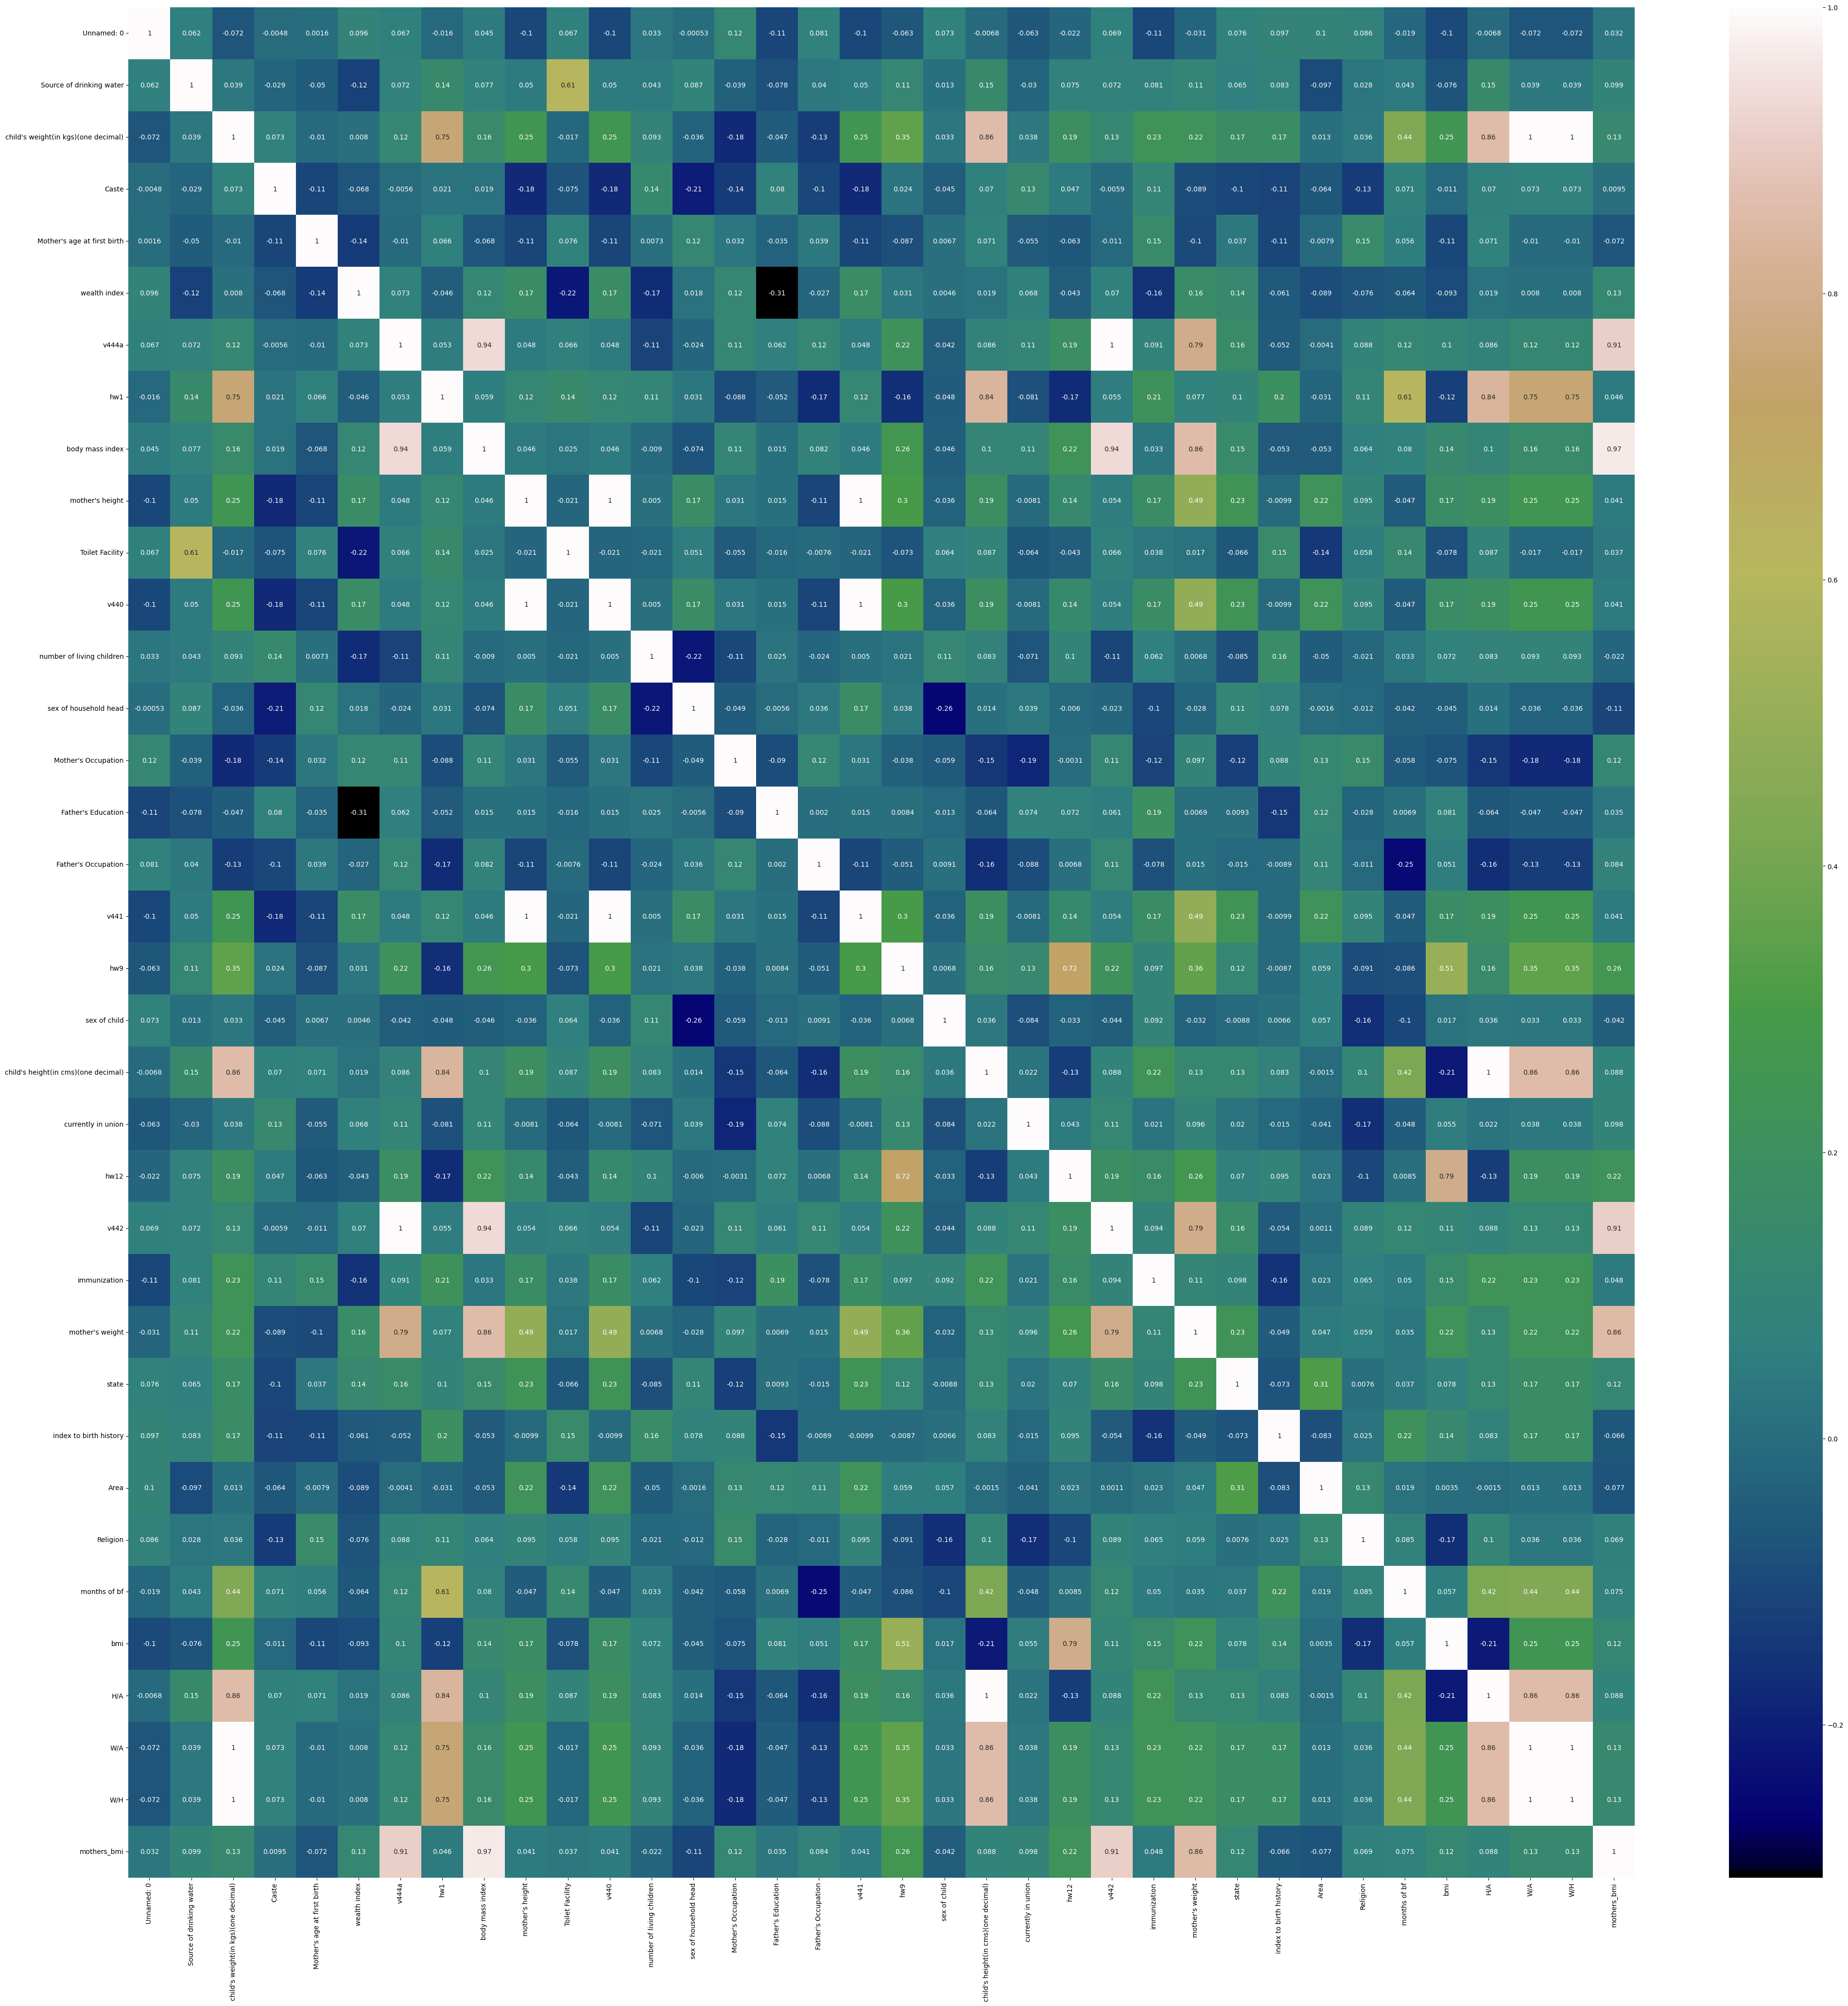

In [ ]:
corrmat = dfl.corr()
top_corr_features = corrmat.index
plt.figure(figsize=(50,50))
#plot heat map
g=sns.heatmap(dfl[top_corr_features].corr(),annot=True,cmap="gist_earth")
plt.show()

In [ ]:
X1, a, b, c, d= split_X_y(dfd)

(133, 76) X shape
(133, 1) y1 shape
(133, 1) y2 shape
(133, 1) y3 shape
(133, 1) y4 shape


In [ ]:
pca_35 = PCA(n_components=35, random_state= 574)
pca_35.fit(X1)
print('variance explained by 35 components is' , sum(pca_35.explained_variance_ratio_*100))

variance explained by 35 components is 99.99999991833944


In [ ]:
pca_16 = PCA(n_components=16, random_state= 52)
pca_16.fit(X1)
print('variance explained by 16 components is' , sum(pca_16.explained_variance_ratio_*100))

variance explained by 16 components is 99.99999951039034


In [ ]:
np.cumsum(pca_16.explained_variance_ratio_*100)

array([80.3648667 , 99.86017485, 99.92389323, 99.97217289, 99.9864201 ,
       99.9987371 , 99.99994268, 99.99997455, 99.99999178, 99.99999727,
       99.99999911, 99.99999929, 99.99999936, 99.99999941, 99.99999946,
       99.99999951])

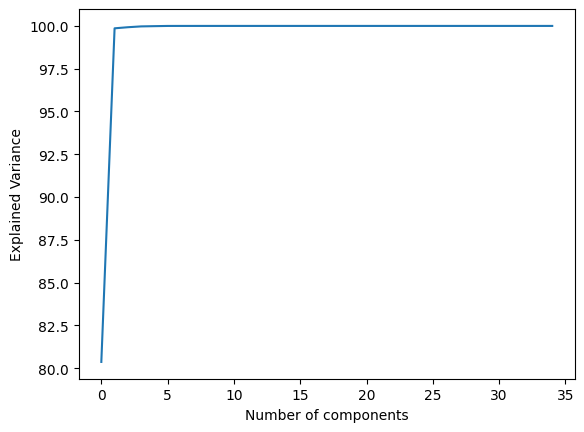

In [ ]:
plt.plot(np.cumsum(pca_35.explained_variance_ratio_*100))
plt.xlabel('Number of components')
plt.ylabel('Explained Variance')
plt.savefig('elbow_plot.png', dpi = 100)

In [ ]:
pca_35.explained_variance_ratio_*100

array([8.03648667e+01, 1.94953082e+01, 6.37183809e-02, 4.82796606e-02,
       1.42472122e-02, 1.23170010e-02, 1.20557507e-03, 3.18738671e-05,
       1.72283568e-05, 5.48647116e-06, 1.84580166e-06, 1.80695750e-07,
       6.50823699e-08, 5.47232669e-08, 4.97027354e-08, 4.75056533e-08,
       3.96767956e-08, 3.68660827e-08, 3.36037904e-08, 3.22570640e-08,
       2.95853823e-08, 2.63320974e-08, 2.46093476e-08, 2.32386636e-08,
       2.20998689e-08, 1.84683206e-08, 1.76656258e-08, 1.62399407e-08,
       1.58951532e-08, 1.55178566e-08, 1.30352416e-08, 1.28335624e-08,
       1.10992863e-08, 9.52912368e-09, 9.39587800e-09])

In [ ]:
# pca_n95 = PCA(n_components=0.95, random_state= 359)
# pca_n95.fit(X1)
X_pca_35 = pca_35.transform(X1)

In [ ]:
X_pca_35.shape

(133, 35)

In [ ]:
X_pca_35

array([[-4.70097142e+03, -1.51387857e+03,  9.90810756e+02, ...,
         3.51396002e-01, -2.02646654e-01,  8.14306552e-01],
       [-6.17419556e+03, -1.22016709e+03,  5.99387767e+02, ...,
         4.12231500e-01, -2.00062229e-01,  2.36009177e-01],
       [-5.48407397e+03, -1.74804833e+03, -1.30704598e+03, ...,
         6.58850167e-02,  2.86535418e-01, -4.00287165e-02],
       ...,
       [ 1.21401507e+05, -1.96887694e+04,  4.40827873e+01, ...,
        -2.77267535e-01, -2.79700892e-02, -9.03805828e-02],
       [-7.06673855e+03, -1.17537223e+03,  4.78419158e+02, ...,
         4.20156963e-01,  1.02273707e-01,  7.29902960e-02],
       [-6.01121678e+03,  1.37670662e+03,  3.89831534e+02, ...,
        -2.68077956e-02, -3.58869285e-03, -3.98928456e-01]])

In [ ]:
dfl = dfl.astype(float)
dfd = dfd.astype(float)

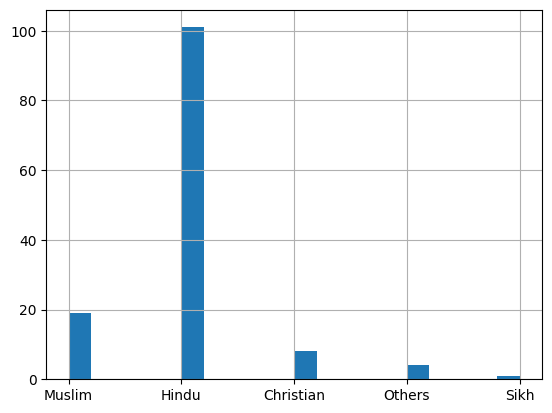

In [ ]:
df['Religion'].hist(bins=20);

new data for pca

In [ ]:
df_pca = pd.DataFrame(X_pca_35, columns = ['PC1', 'PC2', 'PC3', 'PC4', 'PC5', 'PC6', 'PC7', 'PC8', 'PC9', 'PC10', 'PC11', 'PC12', 'PC13', 'PC14', 'PC15', 'PC16',
                                           'PC17', 'PC18', 'PC19', 'PC20', 'PC21', 'PC22', 'PC23', 'PC24', 'PC25', 'PC26', 'PC27', 'PC28', 'PC29', 'PC30', 'PC31',
                                           'PC32', 'PC33', 'PC34', 'PC35'])
df_pca['H/A'] = df['H/A']
df_pca['W/A'] = df['W/A']
df_pca['W/H'] = df['W/H']
df_pca['bmi'] = df['bmi']

In [ ]:
df_pca.shape

(133, 39)

In [ ]:
df_pca

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,...,PC30,PC31,PC32,PC33,PC34,PC35,H/A,W/A,W/H,bmi
0,-4700.971415,-1513.878565,990.810756,1244.620306,-110.764820,126.495305,132.853796,-9.826587,-6.186477,1.816460,...,0.443147,0.250708,0.341191,0.351396,-0.202647,0.814307,1.2200,20.0,2.45,16.058375
1,-6174.195555,-1220.167089,599.387767,1236.921447,264.717863,37.638678,143.133613,-17.262705,-14.257428,2.480757,...,-0.722854,0.716991,-0.347637,0.412232,-0.200062,0.236009,1.2825,20.5,2.50,15.004899
2,-5484.073971,-1748.048334,-1307.045981,1072.953124,-117.701444,-147.109718,77.227862,-6.311134,-1.933558,4.006240,...,0.803151,0.002315,-0.333119,0.065885,0.286535,-0.040029,1.6775,37.0,4.15,15.298289
3,-7138.045689,878.285827,602.469080,1172.046330,214.498264,508.848940,182.001910,3.609321,-17.054287,1.635644,...,0.091021,0.370922,0.296431,-0.140641,-0.455265,0.385814,1.1800,13.5,1.80,12.595144
4,-5133.196100,-3055.099651,328.900603,1091.293961,-651.556405,-232.204528,5.587906,18.366420,17.726758,-10.405485,...,-0.314212,-0.072010,0.035370,0.074943,0.426984,-0.320313,1.5800,39.5,4.40,18.059918
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
128,-6718.916060,33.918160,-1079.246006,-1179.677319,137.583431,360.547453,-141.491083,-20.074717,-18.467179,0.558113,...,-0.406449,-0.204257,-0.262308,0.337792,0.280458,0.262431,2.2050,51.0,5.55,12.357884
129,121817.920041,-16766.911245,2.372828,-487.327819,276.379198,412.931613,-215.618386,29.749759,-25.039089,-8.068437,...,0.397782,0.150633,-0.349995,0.159835,0.068788,0.380573,2.3475,43.0,4.75,9.429505
130,121401.506880,-19688.769391,44.082787,-454.231191,187.015503,-444.188366,77.826381,8.154039,-29.493860,1.765335,...,-0.270081,-0.527880,0.359009,-0.277268,-0.027970,-0.090381,1.6350,11.5,1.60,6.295595
131,-7066.738552,-1175.372226,478.419158,-1072.324061,73.127986,-124.801827,85.105881,0.112777,-3.793947,0.847563,...,0.655737,0.161367,-0.366141,0.420157,0.102274,0.072990,1.4425,25.5,3.00,14.572071


Train Test Val Split

Splitting for original algorithm

In [ ]:
Train, test = train_test_split(dfd, test_size=0.15, random_state = 13)
train, val = train_test_split(Train, test_size=0.15, random_state = 59)

In [ ]:
print(train.shape, ' is the shape of training data for NN')
print(Train.shape, ' is the shape of training data for ML algos')
print(test.shape, ' is the shape of testing data')
print(val.shape, ' is the shape of validation data')

(96, 80)  is the shape of training data for NN
(113, 80)  is the shape of training data for ML algos
(20, 80)  is the shape of testing data
(17, 80)  is the shape of validation data


In [ ]:
X_Train, y1_Train, y2_Train, y3_Train, y4_Train = split_X_y(Train)

(113, 76) X shape
(113, 1) y1 shape
(113, 1) y2 shape
(113, 1) y3 shape
(113, 1) y4 shape


In [ ]:
X_test, y1_test, y2_test, y3_test, y4_test = split_X_y(test)

(20, 76) X shape
(20, 1) y1 shape
(20, 1) y2 shape
(20, 1) y3 shape
(20, 1) y4 shape


In [ ]:
X_val, y1_val, y2_val, y3_val, y4_val  = split_X_y(val)

(17, 76) X shape
(17, 1) y1 shape
(17, 1) y2 shape
(17, 1) y3 shape
(17, 1) y4 shape


In [ ]:
X_train, y1_train, y2_train, y3_train, y4_train  = split_X_y(train)

(96, 76) X shape
(96, 1) y1 shape
(96, 1) y2 shape
(96, 1) y3 shape
(96, 1) y4 shape


In [ ]:
_X_Train = norm(X_Train)
_X_train = norm(X_train)
_X_val = norm(X_val)
_X_test = norm(X_test)

    Unnamed: 0  child's weight(in kgs)(one decimal)     v444a       hw1  \
48    0.444493                             0.676692  0.039041  1.000000   
8     0.066782                             0.902256  0.026865  0.714286   
30    0.263660                             0.571429  0.027928  0.771429   
17    0.110147                             0.932331  0.026962  0.914286   
69    0.556375                             0.593985  0.020390  0.800000   

    body mass index  mother's height      v440  number of living children  \
48         0.715512         0.748718  0.749235                   0.000000   
8          0.470264         0.917949  0.917431                   0.714286   
30         0.431637         0.523077  0.522936                   0.000000   
17         0.545677         0.766667  0.766055                   0.428571   
69         0.362968         0.746154  0.746177                   0.000000   

        v441       hw9  ...  state_West_India  Area_Rural  Area_Urban  \
48  0.748531 

In [ ]:
y1_Train.shape

(113, 1)

Splitting for PCA

In [ ]:
Train_pca, test_pca = train_test_split(df_pca, test_size=0.2, random_state = 368)
train_pca, val_pca = train_test_split(Train_pca, test_size=0.15, random_state = 40)

In [ ]:
print(train_pca.shape, ' is the shape of training data for NN')
print(Train_pca.shape, ' is the shape of training data for ML algos')
print(test_pca.shape, ' is the shape of testing data')
print(val_pca.shape, ' is the shape of validation data')

(90, 39)  is the shape of training data for NN
(106, 39)  is the shape of training data for ML algos
(27, 39)  is the shape of testing data
(16, 39)  is the shape of validation data


In [ ]:
X_Train_pca, y1_Train_pca, y2_Train_pca, y3_Train_pca, y4_Train_pca = split_X_y(Train_pca)


(106, 35) X shape
(106, 1) y1 shape
(106, 1) y2 shape
(106, 1) y3 shape
(106, 1) y4 shape


In [ ]:
X_Train_pca, y1_Train_pca, y2_Train_pca, y3_Train_pca, y4_Train_pca = split_X_y(Train_pca)


(106, 35) X shape
(106, 1) y1 shape
(106, 1) y2 shape
(106, 1) y3 shape
(106, 1) y4 shape


In [ ]:
X_val_pca, y1_val_pca, y2_val_pca, y3_val_pca, y4_val_pca = split_X_y(val_pca)

(16, 35) X shape
(16, 1) y1 shape
(16, 1) y2 shape
(16, 1) y3 shape
(16, 1) y4 shape


In [ ]:
X_test_pca, y1_test_pca, y2_test_pca, y3_test_pca, y4_test_pca = split_X_y(test_pca)


(27, 35) X shape
(27, 1) y1 shape
(27, 1) y2 shape
(27, 1) y3 shape
(27, 1) y4 shape


In [ ]:
X_train_pca, y1_train_pca, y2_train_pca, y3_train_pca, y4_train_pca = split_X_y(train_pca)


(90, 35) X shape
(90, 1) y1 shape
(90, 1) y2 shape
(90, 1) y3 shape
(90, 1) y4 shape


In [ ]:
_X_Train_pca = norm(X_Train_pca)
_X_train_pca = norm(X_train_pca)
_X_val_pca = norm(X_val_pca)
_X_test_pca = norm(X_test_pca)

          PC1       PC2       PC3       PC4       PC5       PC6       PC7  \
18   0.025676  0.164965  0.958237  0.898877  0.270238  0.428391  0.280054   
56   0.025766  0.184479  0.527918  0.510788  0.357833  0.590479  0.077059   
3    0.019254  0.197148  0.695256  0.970064  0.543415  0.723620  0.634504   
109  0.014190  0.180630  0.686295  0.193170  0.230934  0.507300  0.101397   
112  0.037245  0.162248  0.473950  0.156710  0.289673  0.259608  0.650509   

          PC8       PC9      PC10  ...      PC26      PC27      PC28  \
18   0.407845  0.530366  0.405995  ...  0.179397  0.866975  0.604632   
56   0.426865  0.460444  0.515080  ...  0.546820  0.271213  0.327796   
3    0.462424  0.234747  0.539667  ...  0.590110  0.266965  0.469166   
109  0.523747  0.422508  0.396238  ...  0.276332  0.015455  0.516967   
112  0.468625  0.579892  0.489607  ...  0.221703  0.507670  0.364401   

         PC29      PC30      PC31      PC32      PC33      PC34      PC35  
18   0.591934  0.337328  0.0

NN pca


In [ ]:
def base_model_pca(inputs):
    x = tf.keras.layers.Dense(2048, activation= tf.nn.relu)(inputs)
    x = tf.keras.layers.Dropout(0.5)(x)
    x = tf.keras.layers.Dense(1024, activation= tf.nn.relu)(x)
    x = tf.keras.layers.Dense(512, activation= tf.nn.relu)(x)
    x = tf.keras.layers.Dropout(0.3)(x)
    x = tf.keras.layers.Dense(256, activation= tf.nn.relu)(x)
    x = tf.keras.layers.Dropout(0.3)(x)
    x = tf.keras.layers.Dense(256, activation= tf.nn.relu)(x)
    x = tf.keras.layers.Dense(128, activation= tf.nn.relu)(x)
    x = tf.keras.layers.Dropout(0.3)(x)
    x = tf.keras.layers.Dense(128, activation= tf.nn.relu)(x)
    x = tf.keras.layers.Dense(64, activation= tf.nn.relu)(x)
    x = tf.keras.layers.Dropout(0.3)(x)
    x = tf.keras.layers.Dense(64, activation= tf.nn.relu)(x)
    x = tf.keras.layers.Dense(32, activation= tf.nn.relu)(x)
    x = tf.keras.layers.Dropout(0.3)(x)
    x = tf.keras.layers.Dense(16, activation= tf.nn.relu)(x)
    x = tf.keras.layers.Dropout(0.3)(x)
    x = tf.keras.layers.Dense(8, activation= tf.nn.relu)(x)
    return x

In [ ]:
def final_model_pca(inputs):

    # get the base model
    x = base_model_pca(inputs)

    # connect the output Dense layer for classification. this will use a sigmoid activation.
    wa = Dense(units='2', activation='sigmoid', name = 'W/A')(x)
    ha = Dense(units='2', activation='sigmoid', name='H/A')(x)
    wh = Dense(units='2', activation='sigmoid', name='W/H')(x)
    bmi = Dense(units='2', activation='sigmoid', name='Bmi')(x)

    # define the model using the input and output layers
    model = Model(inputs=inputs, outputs=[wa, ha, wh, bmi])

    return model

In [ ]:
# inputs = tf.keras.layers.Input(shape=(25,))
inputs= Input(shape=(len(_X_train_pca.columns,)), name='inputs')
print(type(inputs))
adam = tf.keras.optimizers.Adam(learning_rate=0.0008)
model_pca = final_model_pca(inputs)

model_pca.compile(optimizer=adam,
              loss = {'W/A' : 'binary_crossentropy',
                      'H/A' : 'binary_crossentropy',
                      'W/H' : 'binary_crossentropy',
                      'Bmi' : 'binary_crossentropy'
                     },
              metrics = {'W/A' : 'accuracy',
                         'H/A' : 'accuracy',
                         'W/H' : 'accuracy',
                         'Bmi' : 'accuracy'
                       }
             )

<class 'keras.src.engine.keras_tensor.KerasTensor'>


In [ ]:
_X_train_pca_np = _X_train_pca.to_numpy()
_X_test_pca_np = _X_test_pca.to_numpy()
_X_Train_pca_np = _X_Train_pca.to_numpy()
_X_val_pca_np = _X_val_pca.to_numpy()

In [ ]:
from tensorflow.keras.utils import to_categorical

# Assuming the correct number of classes is determined by the unique values in the arrays
num_classes_y1 = len(np.unique(y1_train_pca))
num_classes_y2 = len(np.unique(y2_train_pca))
num_classes_y3 = len(np.unique(y3_train_pca))
num_classes_y4 = len(np.unique(y4_train_pca))

y1_train_pca_oh = to_categorical(y1_train_pca, num_classes_y1)
y2_train_pca_oh = to_categorical(y2_train_pca, num_classes_y2)
y3_train_pca_oh = to_categorical(y3_train_pca, num_classes_y3)
y4_train_pca_oh = to_categorical(y4_train_pca, num_classes_y4)


IndexError: index 62 is out of bounds for axis 1 with size 57